In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ls data/

FEDFUNDS.csv  ^GSPC.csv


In [14]:
sandp_df = pd.read_csv('data/^GSPC.csv', sep=',')
sandp_df['Date'] = pd.to_datetime(sandp_df['Date'])
sandp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [15]:
sandp_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
17417,2019-03-25,2796.010010,2809.790039,2785.020020,2798.360107,2798.360107,3376580000
17418,2019-03-26,2812.659912,2829.870117,2803.989990,2818.459961,2818.459961,3266050000
17419,2019-03-27,2819.719971,2825.560059,2787.719971,2805.370117,2805.370117,3372930000
17420,2019-03-28,2809.399902,2819.709961,2798.770020,2815.439941,2815.439941,3158170000
17421,2019-03-29,2828.270020,2836.030029,2819.229980,2834.399902,2834.399902,3740700000


In [16]:
sandp_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,17422.000000,17422.000000,17422.000000,17422.000000,17422.000000,1.742200e+04
mean,576.186146,579.587836,572.585569,576.312075,576.312075,9.307335e+08
std,686.997628,690.501119,683.191893,687.094989,687.094989,1.554432e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,86.002500,86.677498,85.292502,86.012501,86.012501,8.970000e+06
50%,166.944999,167.629997,166.070000,166.950005,166.950005,9.487500e+07
75%,1097.794983,1105.507508,1091.059998,1097.832519,1097.832519,1.214275e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


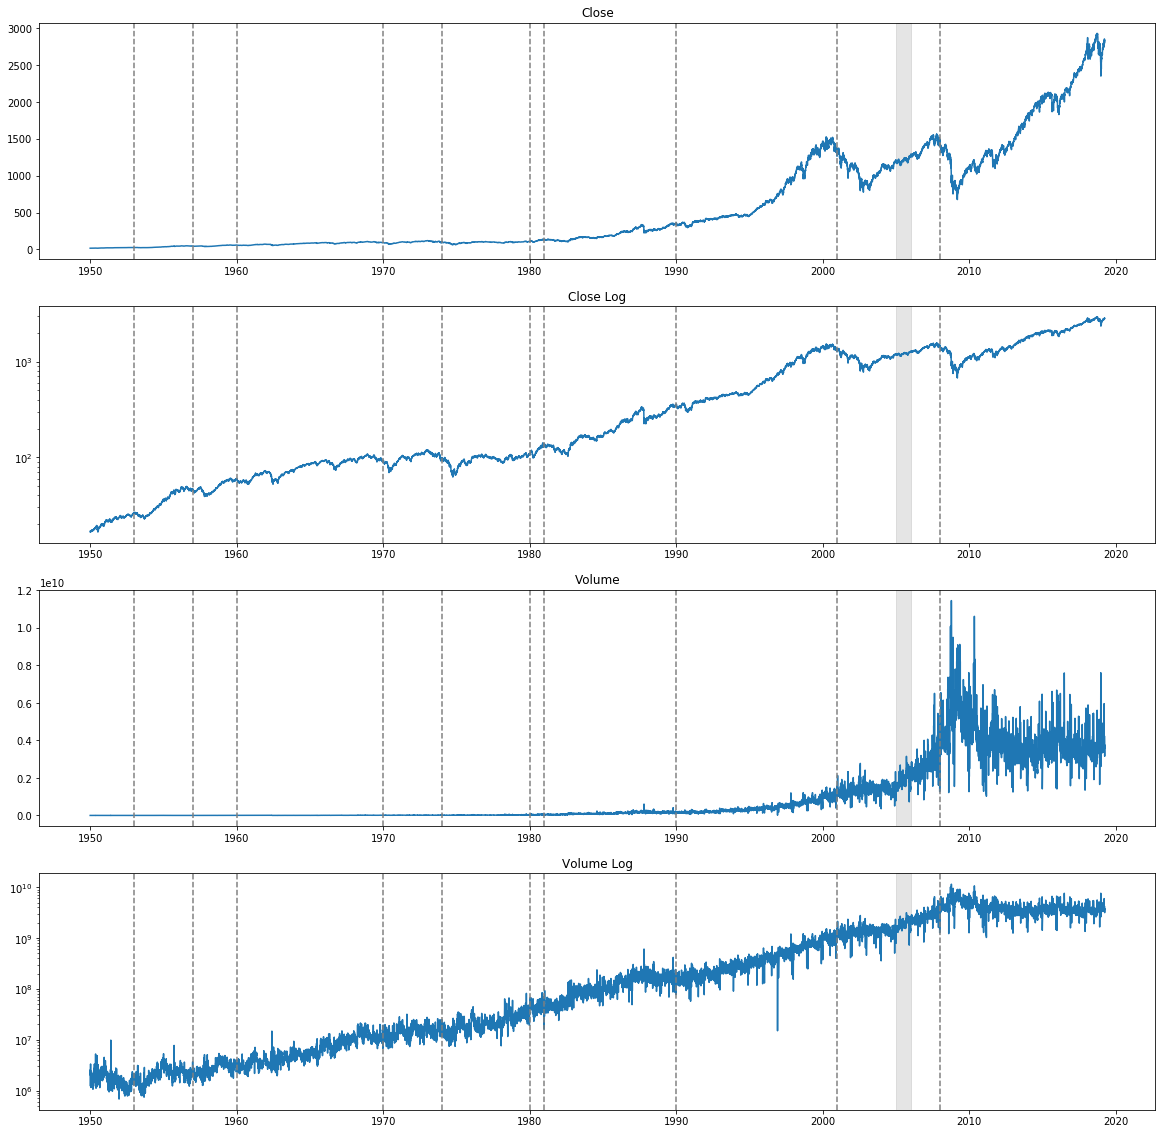

In [36]:
def plot_recessions(ax):
#     recession_years = [1918, 1920, 1923, 1927, 1929, 1937, 1945, 1948, 1953, 1957, 1960, 1970, 1974, 1980, 1981, 1990, 2001, 2008]
    recession_years = [1953, 1957, 1960, 1970, 1974, 1980, 1981, 1990, 2001, 2008]
    ax.axvspan(pd.to_datetime(f'20050101', format='%Y%m%d'),
               pd.to_datetime(f'20060101', format='%Y%m%d'),
               alpha=0.2, color='gray')
    for year in recession_years:
        dt = pd.to_datetime(f'{year}0101', format='%Y%m%d')
        ax.axvline(x=dt, linestyle='dashed', color='grey')

fig, axes = plt.subplots(4,1,figsize=(20,20))

axes[0].plot(sandp_df['Date'], sandp_df['Close'])
axes[0].set_title('Close')
plot_recessions(axes[0])

axes[1].plot(sandp_df['Date'], sandp_df['Close'])
axes[1].set_yscale('log')
axes[1].set_title('Close Log')
plot_recessions(axes[1])

axes[2].plot(sandp_df['Date'], sandp_df['Volume'])
axes[2].set_title('Volume')
plot_recessions(axes[2])

axes[3].plot(sandp_df['Date'], sandp_df['Volume'])
axes[3].set_yscale('log')
axes[3].set_title('Volume Log')
plot_recessions(axes[3])

plt.show()